<a href="https://colab.research.google.com/github/Akshat13shah/ML_Prerequisite_Test_answer/blob/main/ML_preq_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Akshat Shah

# Roll number:-23110293

Q1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



A1)
1. We are given two matrices one with n rows and k columns and other with k rows and m columns.
2. We will get a matrix with n rows and m columns
3. we will multiply each row of first matrix with each column of second matrix, so k columns of first will multipied with one element from k rows of second matrix resulting in k multiplications
4. Now if we add this multipication results which will be (k-1)
5. And we know new matrix has mn elements so total addition will be mn(k-1) and total multiplication will be mnk

Q2)write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import time
import random

# Generating two random matrices A (n x k) and B (k x m)
n, k, m = 200, 300, 150

# Creating A and B using list comprehensions
A = [[random.randint(0, 10) for i in range(k)] for j in range(n)]
B = [[random.randint(0, 10) for i in range(m)] for j in range(k)]

# Matrix multiplication using Python lists
def matrix_multiply_python(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    C = [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            for t in range(k):
                C[i][j] += A[i][t] * B[t][j]
    return C

# Measuring time
start = time.time()
C_python = matrix_multiply_python(A, B)
end = time.time()
print("Python Time:", end - start, "seconds")

import numpy as np
A_np = np.array(A)
B_np = np.array(B)

start = time.time()
C_numpy = np.matmul(A_np, B_np)
end = time.time()
print("NumPy Time:", end - start, "seconds")

Python Time: 1.174701452255249 seconds
NumPy Time: 0.00963139533996582 seconds


From here we can clearly see that numpy multiplication is much faster than python list method
this is because the pyhton list method use nested loops which is slower whereas numpy skipes these and does everything internally.
And numpy are implemented on C which is faster than python language.

Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

A3)
1. We are given a naive method where we remove the largest element, if there are n elemets if n is odd we will find the n//2 smallest element, and if it is even then we will find the n//2-1 and n//2 smallest element and takes its average here time complexity is (n)^2.
2. The better way is to sort the list which will cost us nlog(n) time, here will pick the middle term.

In [2]:
n = 10001
original_list = [random.randint(1, 100000) for i in range(n)]

# Make copies for different methods
list_numpy = original_list.copy()
list_naive = original_list.copy()
list_sorted = original_list.copy()

#NumPy Median
start_np = time.time()
median_np = np.median(list_numpy)
end_np = time.time()
time_np = end_np - start_np

#Naive Median
start_naive = time.time()
# Removing the largest elements len//2 times
for _ in range(len(list_naive) // 2):
    max_val = max(list_naive)
    list_naive.remove(max_val)
# Now the next max is the median
median_naive = max(list_naive)
end_naive = time.time()
time_naive = end_naive - start_naive

#Sorted Median
start_sort = time.time()
list_sorted.sort()
if len(list_sorted) % 2 == 1:
    median_sorted = list_sorted[len(list_sorted) // 2]
else:
    i = len(list_sorted) // 2
    median_sorted = (list_sorted[i - 1] + list_sorted[i]) / 2
end_sort = time.time()
time_sorted = end_sort - start_sort

#Results
{
    "Median (Naive)": median_naive,
    "Time (Naive)": round(time_naive, 5),
    "Median (Sorted)": median_sorted,
    "Time (Sorted)": round(time_sorted, 5),
    "Median (NumPy)": median_np,
    "Time (NumPy)": round(time_np, 5)
}

{'Median (Naive)': 49273,
 'Time (Naive)': 0.83241,
 'Median (Sorted)': 49273,
 'Time (Sorted)': 0.00186,
 'Median (NumPy)': np.float64(49273.0),
 'Time (NumPy)': 0.00416}

Q4) What is the gradient of the following function with respect to x and y?


There the equation is $x^2.y+y^3 sin(x)$

so its derivative will be $(2xy+y^3.cos(x),x^2+3y^2.sin(x))$

Q5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [3]:
import jax
import math
import jax.numpy as jnp

#Using the result formula
def gr(x,y):
  return [2*x*y + (y**3)*math.cos(x) , x**2 + (3*y**2)*math.sin(x)]

#Using JAX
def f(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)
gradf=jax.grad(f,argnums=(0, 1))

x=np.random.rand(5)
y=np.random.rand(5)

print("Output format: Partial derivatives w.r.t. x and y respectively")
for i in range(len(x)):
  grad=gradf(x[i],y[i])
  print("Using JAX:",grad[0],grad[1])
  print("Using resulting formula:",gr(x[i],y[i])[0],gr(x[i],y[i])[1])


Output format: Partial derivatives w.r.t. x and y respectively
Using JAX: 1.3931704 0.9182212
Using resulting formula: 1.393170316662509 0.9182211489722306
Using JAX: 0.97957015 0.39848083
Using resulting formula: 0.9795701923788392 0.39848085395116395
Using JAX: 0.39492497 0.30001342
Using resulting formula: 0.3949250014398672 0.30001342832949235
Using JAX: 1.1872985 1.1898851
Using resulting formula: 1.187298556158655 1.1898851852649364
Using JAX: 0.967639 1.4061658
Using resulting formula: 0.9676389602462663 1.4061658164583097


Q6) Use sympy to confirm that you obtain the same gradient analytically.

In [4]:
import sympy as sp

x,y=sp.symbols('x y')
f = (x**2)*y + (y**3)*sp.sin(x)

gx=sp.diff(f,x)#with repsect to x
gy=sp.diff(f,y)#with repsect to y

print("Gradient of f with respect to x, y:")
print([gx,gy])


Gradient of f with respect to x, y:
[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


Q7)

In [5]:
data = {
    2022: {
        'Branch_1': {
            'Roll No': 1,
            'Name': 'XYZ',
            'Marks': {
                'English': 70,
                'Maths': 100
            }
        }
    },
    2023: {
        'Branch_1': {},'Branch_2': {}},
    2024: {
        'Branch_1': {},'Branch_2': {}},
    2025: {
        'Branch_1': {},'Branch_2': {}}
}

print(data)


{2022: {'Branch_1': {'Roll No': 1, 'Name': 'XYZ', 'Marks': {'English': 70, 'Maths': 100}}}, 2023: {'Branch_1': {}, 'Branch_2': {}}, 2024: {'Branch_1': {}, 'Branch_2': {}}, 2025: {'Branch_1': {}, 'Branch_2': {}}}


Q8)

In [6]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks  # dictionary of subject: score

# Branch class
class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []  # list of Student objects

    def add_student(self, student):
        self.students.append(student)

# Year class
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # list of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

# overall database
class Database:
    def __init__(self):
        self.years = []  # list of Year objects

    def add_year(self, year_obj):
        self.years.append(year_obj)


database = Database()

# Year 2022
year_2022 = Year(2022)

# Branch 1 (2022)
branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(110, "A", {"Subject1": 100}))
branch_1_2022.add_student(Student(111, "B", {"Subject1": 85, "Subject2": 75}))
year_2022.add_branch(branch_1_2022)

# Branch 2 (2022)
branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(112, "C", {"Subject1": 90, "Subject2": 80}))
year_2022.add_branch(branch_2_2022)

# Add year to database
database.add_year(year_2022)

# Add empty years (2023–2025)
for y in [2023, 2024, 2025]:
    yr = Year(y)
    yr.add_branch(Branch("Branch 1"))
    yr.add_branch(Branch("Branch 2"))
    database.add_year(yr)




Q9)

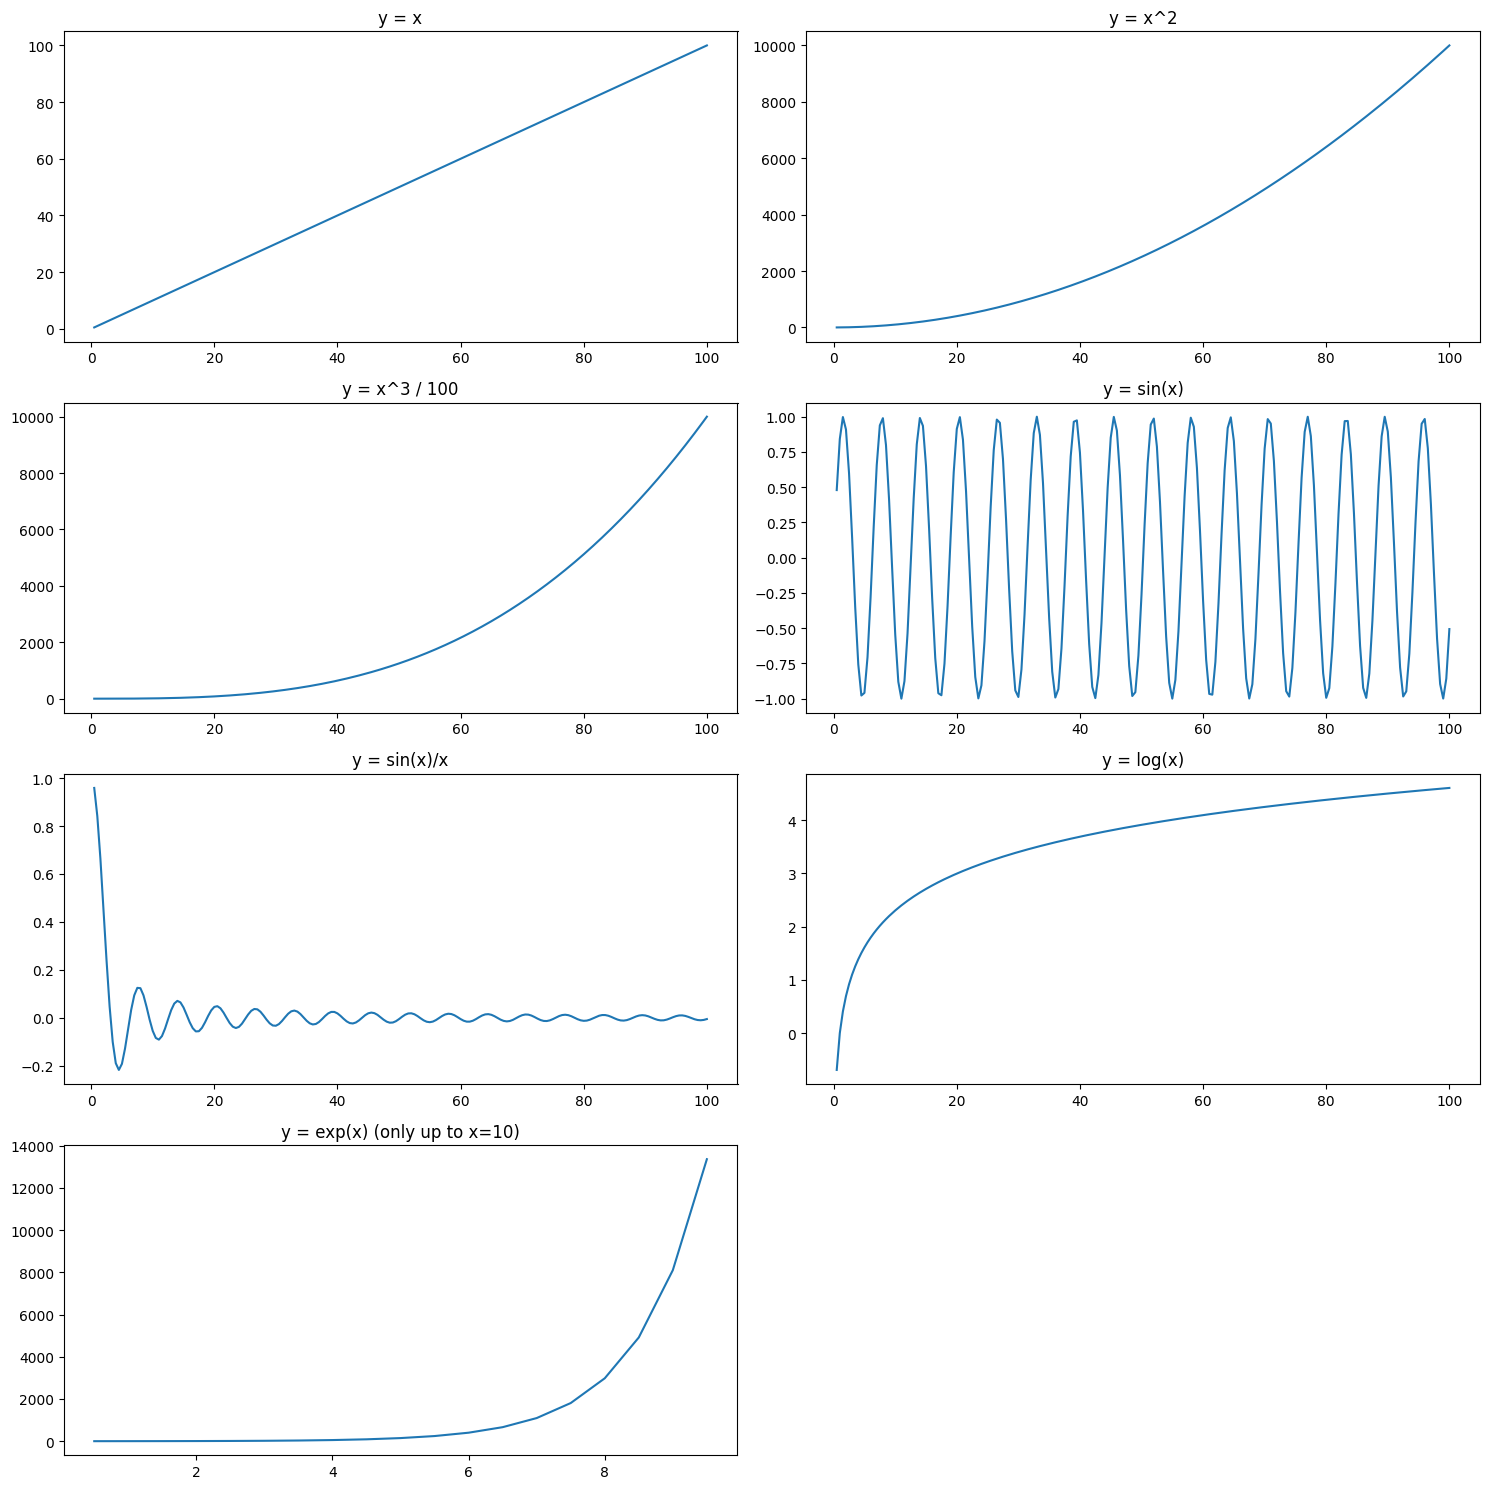

In [7]:
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)


y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)


x_small = np.arange(0.5, 10, 0.5)
y7_small = np.exp(x_small)


plt.figure(figsize=(15, 15))

plt.subplot(4, 2, 1)
plt.plot(x, y1)
plt.title("y = x")

plt.subplot(4, 2, 2)
plt.plot(x, y2)
plt.title("y = x^2")

plt.subplot(4, 2, 3)
plt.plot(x, y3)
plt.title("y = x^3 / 100")

plt.subplot(4, 2, 4)
plt.plot(x, y4)
plt.title("y = sin(x)")

plt.subplot(4, 2, 5)
plt.plot(x, y5)
plt.title("y = sin(x)/x")

plt.subplot(4, 2, 6)
plt.plot(x, y6)
plt.title("y = log(x)")

plt.subplot(4, 2, 7)
plt.plot(x_small, y7_small)
plt.title("y = exp(x) (only up to x=10)")

plt.tight_layout()
plt.show()


Q 10)Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [8]:
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

#column with the highest standard deviation
std_devs = df.std()
highest_std_column = std_devs.idxmax()
print("Column with highest standard deviation:", highest_std_column)

#row with the lowest mean
row_means = df.mean(axis=1)
lowest_mean_row_index = row_means.idxmin()
print("Row with lowest mean is at index:", lowest_mean_row_index)


Column with highest standard deviation: d
Row with lowest mean is at index: 3


Q11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively

In [9]:
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

lt8_count = (df["g"] == "LT8").sum()
print("Number of rows where g == 'LT8':", lt8_count)

std_lt8 = df[df["g"] == "LT8"]["f"].std()
std_gt8 = df[df["g"] == "GT8"]["f"].std()

print("Standard deviation of f for LT8 rows:", std_lt8)
print("Standard deviation of f for GT8 rows:", std_gt8)

df

Number of rows where g == 'LT8': 14
Standard deviation of f for LT8 rows: 0.39556692712259256
Standard deviation of f for GT8 rows: 0.5826974405084915


,a,b,c,d,e,f,g
0,1.663716,1.076906,1.855124,1.115286,1.988902,7.699934,LT8
1,1.784082,1.540222,1.030903,1.050605,1.548713,6.954524,LT8
2,1.982194,1.754768,1.020716,1.037676,1.356643,7.151996,LT8
3,1.632324,1.018029,1.114672,1.117891,1.753697,6.636614,LT8
4,1.945072,1.789764,1.932095,1.978121,1.983575,9.628627,GT8
5,1.770579,1.391935,1.995565,1.105155,1.457516,7.720749,LT8
6,1.471057,1.062596,1.732426,1.100708,1.430113,6.796899,LT8
7,1.469036,1.252114,1.857379,1.853133,1.013091,7.444752,LT8
8,1.175766,1.895107,1.311758,1.540365,1.704838,7.627833,LT8
9,1.731973,1.587858,1.390479,1.443308,1.416600,7.570218,LT8


Q12) Write a small piece of code to explain broadcasting in numpy.

In [10]:
a = np.array([1, 2, 3])
b = np.array([[10],
              [20],
              [30]])
result = b + a

print("Array a:\n", a)
print("Array b:\n", b)
print("Result (b + a):\n", result)


Array a:
 [1 2 3]
Array b:
 [[10]
 [20]
 [30]]
Result (b + a):
 [[11 12 13]
 [21 22 23]
 [31 32 33]]


Q13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [11]:
arr=np.random.randint(10, 20, size=10)
print(arr)
def argmin_arr(arr):
    m=min(arr)
    for i in range(len(arr)):
        if arr[i]==m:
            print("Index of minimum element:",i)
            break
argmin_arr(arr)
print("Using np.argmin:",np.argmin(arr))

[18 17 12 14 17 10 17 19 17 10]
Index of minimum element: 5
Using np.argmin: 5
